In [23]:
import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
# import pstats
# from pstats import SortKey

filepath = 'Test_dataset_results_102522_Sagemaker_B3_B4_B10.xlsx'

In [3]:
# Read in B4 band output for file 0011
file_11_b4 = pd.read_excel(filepath, sheet_name='File00011_B4')

file_11_b4

,Ground truth negative,Ground truth positive
0,LC08_L1TP_043027_20180306_20180320_01_T1_B4.JP...,LC08_L1TP_020026_20180217_20180307_01_T1_B4.JP...
1,LC08_L1TP_195041_20180619_20180703_01_T1_B4.JP...,LC08_L1TP_191035_20181114_20181128_01_T1_B4.JP...
2,LC08_L1TP_010047_20180315_20180320_01_T1_B4.JP...,LC08_L1TP_226090_20180119_20180206_01_T1_B4.JP...
3,LC08_L1TP_221065_20181202_20181211_01_T1_B4.JP...,LC08_L1TP_014036_20180903_20180912_01_T1_B4.JP...
4,LC08_L1TP_232071_20181113_20181127_01_T1_B4.JP...,LC08_L1TP_030044_20180802_20180814_01_T1_B4.JP...
5,LC08_L1TP_219079_20181204_20181211_01_T1_B4.JP...,LC08_L1TP_044030_20180329_20180405_01_T1_B4.JP...
6,LC08_L1TP_227085_20180907_20180912_01_T1_B4.JP...,LC08_L1TP_020037_20180929_20181009_01_T1_B4.JP...
7,LC08_L1TP_040029_20180707_20180717_01_T1_B4.JP...,LC08_L1TP_002067_20181220_20181227_01_T1_B4.JP...
8,LC08_L1TP_227091_20181228_20190129_01_T1_B4.JP...,LC08_L1TP_218073_20181213_20181227_01_T1_B4.JP...
9,LC08_L1TP_187052_20180526_20180605_01_T1_B4.JP...,LC08_L1TP_190055_20180531_20180614_01_T1_B4.JP...


In [11]:
file_11_b4.rename(mapper={'Ground truth negative':'Ground_truth_negative', 'Ground truth positive':'Ground_truth_positive'}, axis=1, inplace=True)

In [12]:
# Parse out predicted value for ground truth negative column
GN = file_11_b4['Ground_truth_negative'].str.split(' ').str[3]
df1 = pd.DataFrame(GN)
df1

,Ground_truth_negative
0,pos
1,pos
2,neg
3,pos
4,pos
5,neg
6,pos
7,pos
8,pos
9,pos


In [13]:
# Parse out predicted value for ground truth positive column
GP =  file_11_b4['Ground_truth_positive'].str.split(' ').str[3]
df = pd.DataFrame(GP)
df


,Ground_truth_positive
0,pos
1,neg
2,pos
3,pos
4,pos
5,pos
6,neg
7,pos
8,neg
9,neg


In [14]:
# Turn 'pos' predictions into 1s and 'neg' predictions into 0s for ground truth positive column
Predicted_GP= df['Ground_truth_positive'].map({'pos': 1, 'neg': 0})

# Display modified DataFrame
print("Modified DataFrame:\n",Predicted_GP)

Modified DataFrame:
 0     1
1     0
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    1
Name: Ground_truth_positive, dtype: int64


In [15]:
# Create a corresponding data frame for the predicted values in the ground truth positives column with all values equal to 1 since these are images with confirmed contrails
actual_GP = df['Ground_truth_positive'].map({'pos': 1, 'neg': 1})

# Display modified DataFrame
print("Modified DataFrame:\n",actual_GP)

Modified DataFrame:
 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
Name: Ground_truth_positive, dtype: int64


In [16]:
# Turn 'pos' predictions into 1s and 'neg' predictions into 0s for ground truth negative column
Predicted_GN= df1['Ground_truth_negative'].map({'pos': 1, 'neg': 0})

# Display modified DataFrame
print("Modified DataFrame:\n",Predicted_GN)

Modified DataFrame:
 0     1.0
1     1.0
2     0.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    1.0
17    0.0
18    1.0
19    1.0
20    NaN
Name: Ground_truth_negative, dtype: float64


In [17]:
# Create a corresponding data frame for the predicted values in the ground truth positives column with all values equal to 0 since these are images confirmed w/o contrails
actual_GN = df1['Ground_truth_negative'].map({'pos': 0, 'neg': 0})

# Display modified DataFrame
print("Modified DataFrame:\n",actual_GN)

Modified DataFrame:
 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    NaN
Name: Ground_truth_negative, dtype: float64


In [18]:
# merge the predicted values for ground truth positive and ground truth negative columns horizontally 

Predicted = pd.concat([Predicted_GP, Predicted_GN], axis=0, join='outer')
 
Predicted

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
6     0.0
7     1.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    0.0
19    1.0
20    1.0
0     1.0
1     1.0
2     0.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    1.0
17    0.0
18    1.0
19    1.0
20    NaN
dtype: float64

In [19]:
# merge the actual values for ground truth positive and ground truth negative columns horizontally 
Actual = pd.concat([actual_GP, actual_GN], axis=0, join='outer')
 
Actual

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    NaN
dtype: float64

In [20]:
# create a data frame with actual and predicted values alongside each other 
B4_0011 = pd.concat([Actual, Predicted], axis=1, join='outer')
 
B4_0011.columns = ['actual','predicted']

B4_0011

,actual,predicted
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,0.0
7,1.0,1.0
8,1.0,0.0
9,1.0,0.0


Predicted  0.0  1.0
Actual             
0.0          7   13
1.0          7   14


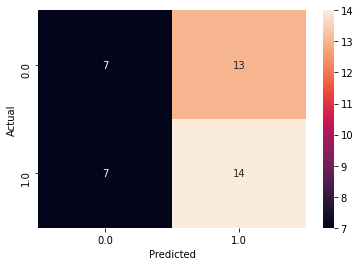

The accuracy of this model is 0.51


In [26]:
# create a confusion matrix for B4 bands file 00011
confusion_matrix = pd.crosstab(B4_0011['actual'], B4_0011['predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

sn.heatmap(confusion_matrix, annot=True)
plt.show()
# confusion_matrix.print_stats()
# Accuracy
acc = np.diag(confusion_matrix).sum() / confusion_matrix.to_numpy().sum()
print(f"The accuracy of this model is {acc.round(2)}")